# Word Cloud

In [1]:
import nltk

In [3]:
# punkt, stopwords download
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

>Wordcloud 설치:conda install -c conda-forge wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS # 전부 대문자면 상수(한 번 정해지면 바꾸지 못하는)
from PIL import Image

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
#### Alice in Wonderland

In [8]:
with open ('data/Alice.txt') as file:
    text = file.read()

In [17]:
print(type(STOPWORDS), 'len:', len(STOPWORDS), STOPWORDS, sep='\n')

<class 'set'>
len:
193
{'only', 'when', 'was', "he'll", 'our', "shouldn't", "wouldn't", 'from', "wasn't", 'just', 'all', 'theirs', 'at', "i'd", 'otherwise', "he's", 'these', 'or', 'again', 'below', "you've", 'too', 'both', "they'd", 'been', 'about', 'hence', 'has', 'your', "she's", 'having', 'said', 'r', 'of', 'down', 'ever', "they'll", "couldn't", 'into', 'out', 'get', "i've", "let's", "you'd", 'a', "they're", 'since', 'you', 'which', 'why', 'do', 'in', 'doing', 'ought', "he'd", 'me', 'on', "how's", 'over', 'could', "we'd", 'else', 'whom', 'but', 'where', 'him', 'here', 'after', 'who', 'herself', "we'll", 'myself', 'very', "why's", 'the', 'itself', 'his', "isn't", 'more', 'such', 'not', "shan't", 'how', 'can', 'those', 'off', 'ours', 'i', "where's", 'were', 'few', 'if', "don't", 'some', 'so', 'while', "doesn't", 'until', 'they', "didn't", 'are', "what's", "you're", "can't", 'with', "won't", 'further', 'did', 'we', 'themselves', 'would', 'cannot', 'being', 'once', "we're", 'am', "haven

In [14]:
# stopwords
stopwords = STOPWORDS

In [15]:
# stopwords에 'said' 추가
stopwords.add('said')

In [16]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
wc.generate(text)

In [18]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}: {values[i]}')

Alice: 1.0
little: 0.29508196721311475
one: 0.27595628415300544
know: 0.2459016393442623
went: 0.226775956284153
thing: 0.2185792349726776
time: 0.2103825136612022
Queen: 0.20765027322404372
see: 0.1830601092896175
King: 0.17486338797814208


In [27]:
print(len(keys), keys[:100])

2000 ['Alice', 'little', 'one', 'know', 'went', 'thing', 'time', 'Queen', 'see', 'King', 'well', 'now', 'head', 'began', 'way', 'Hatter', 'Mock Turtle', 'say', 'Gryphon', 'think', 'quite', 'much', 'first', 'thought', 'go', 'come', 'never', 'voice', 'looked', 'got', 'must', 'Cat', 'Duchess', 'Mouse', 'round', 'back', 'two', 'Dormouse', 'make', 'Oh', 'tone', 'eye', 'came', 'last', 'nothing', 'tell', 'day', 'large', 'great', 'hand', 'found', 'long', 'door', 'minute', 'looking', 'put', 'word', 'March Hare', 'made', 'heard', 'look', 'will', 'replied', 'might', 'Caterpillar', 'seemed', 'going', 'right', 'away', 'without', 'moment', 'course', 'thought Alice', 'Rabbit', 'next', 'rather', 'soon', 'yet', 'dear', 'took', 'take', 'sure', 'sort', 'felt', 'added', 'getting', 'Let', 'three', 'find', 'White Rabbit', 'upon', 'wish', 'question', 'side', 'till', 'arm', 'use', 'anything', 'end', 'good']


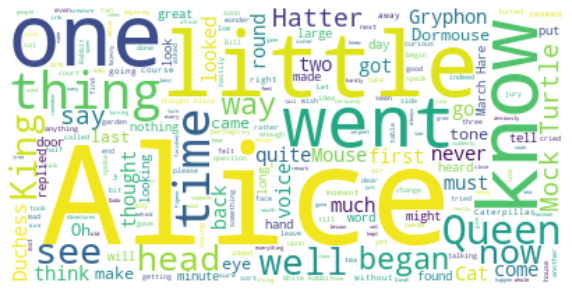

In [20]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

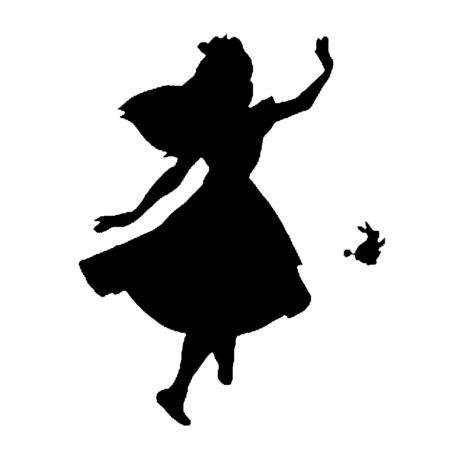

In [26]:
# 그림 위에 표시하기 - 그림 표시
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

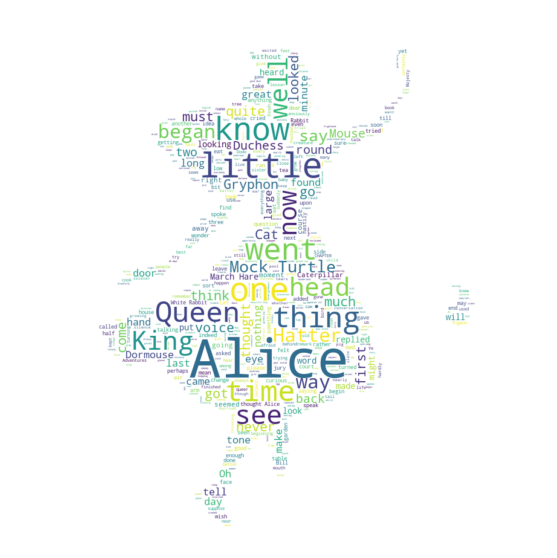

In [29]:
# 그림 위에 표시하기 - 그림 표시
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords, mask=mask)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

---
#### Star Wars - A New Hope

In [30]:
with open ('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE's", 'Luke')
mask = np.array(Image.open('data/Stormtrooper_mask.png'))

In [32]:
stopwords = STOPWORDS
stopwords.add('int')
stopwords.add('ext')

In [33]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [34]:
# HSL(Hue, Saturation, Lightness) 코드로 변환
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60,101)}%)'

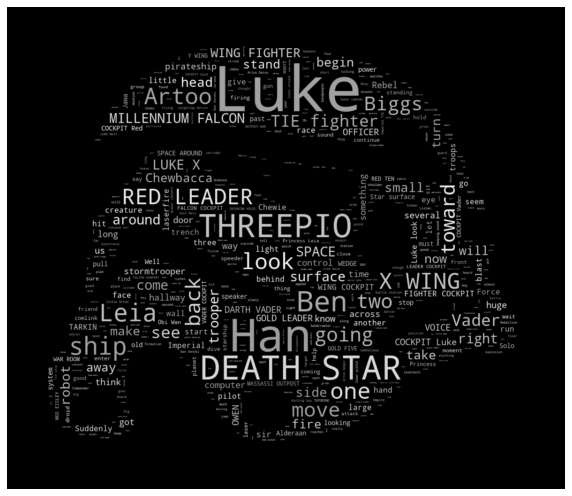

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()